In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [85]:
right = pd.read_csv('60cm-try1-pilot_test/3-right_leg_tibi_20250429_191907_957.csv', skiprows=10, sep=",")
left = pd.read_csv('60cm-try1-pilot_test/2-left_leg_tibia_20250429_191907_955.csv', skiprows=10, sep=",")
pelvis = pd.read_csv('60cm-try1-pilot_test/1-pelvis(s2)_20250429_191907_953.csv', skiprows=10, sep=",")

In [86]:
time = right['SampleTimeFine']-right['SampleTimeFine'].iloc[0]
right['Tim-se']= time*1e-6
right['Tim_dt'] = right['Tim-se'].diff()
right['a_z'] = right['dv[3]'] / right['Tim_dt']

left['Tim-se'] = time * 1e-6
left['Tim_dt'] = left['Tim-se'].diff()
left['a_z'] = left['dv[3]'] / left['Tim_dt']

# For left dataframe

pelvis['Tim-se'] = time* 1e-6
pelvis['Tim_dt'] = pelvis['Tim-se'].diff()
pelvis['a_z'] = pelvis['dv[3]'] / pelvis['Tim_dt']

In [87]:
pelvis.head()

,PacketCounter,SampleTimeFine,dq_W,dq_X,dq_Y,dq_Z,dv[1],dv[2],dv[3],Status,Tim-se,Tim_dt,a_z
0,1,2075111608,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,NaN,NaN
1,2,2075128275,1.0,0.000149,-0.000122,-0.000041,0.162288,0.006539,0.023608,0,0.016667,0.016667,1.416452
2,3,2075144942,1.0,-0.000169,-0.000485,-0.000140,0.166277,0.005257,0.021374,0,0.033334,0.016667,1.282414
3,4,2075161609,1.0,-0.000029,-0.000375,-0.000228,0.164854,0.000634,0.021132,0,0.050001,0.016667,1.267895
4,5,2075178276,1.0,0.000521,-0.000567,-0.000246,0.163105,-0.002589,0.021348,0,0.066668,0.016667,1.280854


In [88]:
left['a_z'].describe()


count    458.000000
mean      -1.558846
std        8.265981
min      -79.875562
25%       -1.934331
50%       -1.261535
75%       -0.418732
max       90.062099
Name: a_z, dtype: float64

In [89]:
right['a_z'].describe()

count    458.000000
mean      -1.806382
std        5.615178
min      -59.006720
25%       -1.383032
50%       -0.850243
75%       -0.632687
max       31.304974
Name: a_z, dtype: float64

In [90]:
pelvis['a_z'].describe()

count    458.000000
mean       2.790766
std        5.481248
min      -37.431571
25%        1.220121
50%        1.507620
75%        1.994000
max       59.229735
Name: a_z, dtype: float64

<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='Tim-se'>

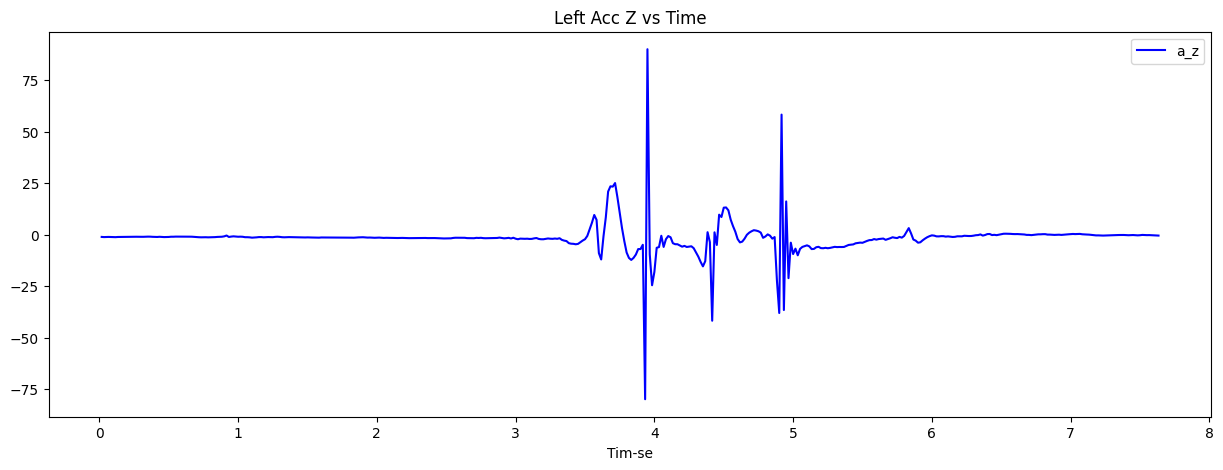

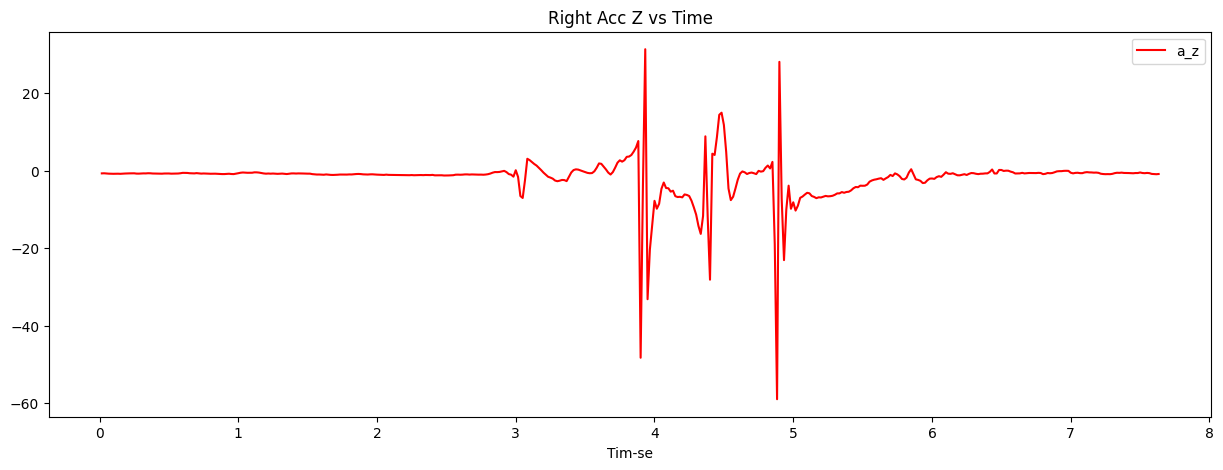

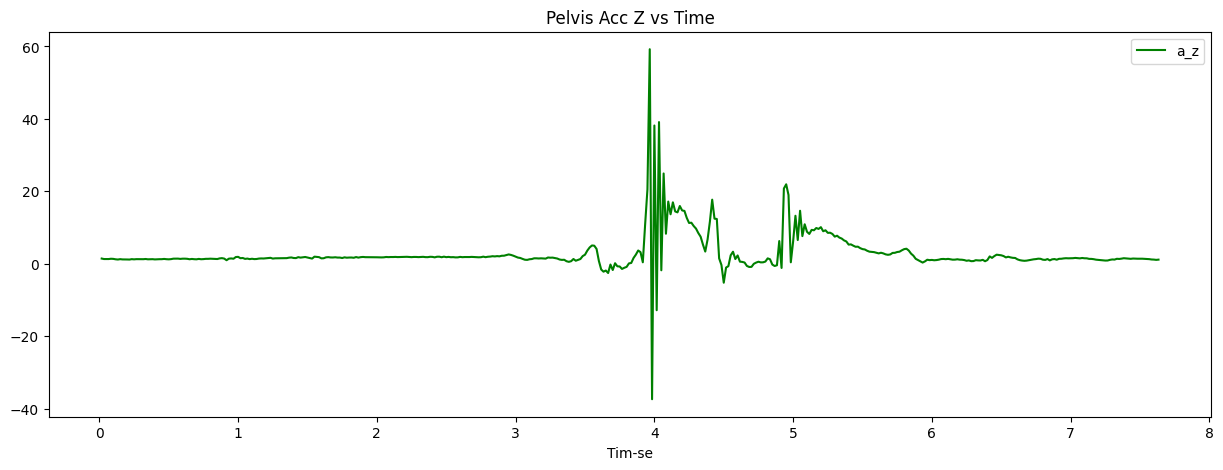

In [91]:
# Visualize the data and find the connection between the accelerometer and ties
left.plot(x='Tim-se', y='a_z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='Tim-se', y='a_z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='Tim-se', y='a_z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')
